In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy.linalg import svd

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(X_train.shape, Y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
print(X_test.shape, Y_test.shape)

(10000, 28, 28) (10000,)


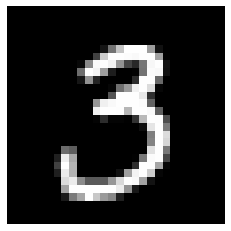

3


In [5]:
plt.imshow(X_test[90], cmap='gray')
plt.axis("off")
plt.show()

print(Y_test[90])

In [6]:
X = X_test.reshape(-1, 28*28)
Y = Y_test

print(X.shape, Y.shape)

(10000, 784) (10000,)


### Step-1 : Preprocessing

In [7]:
sc = StandardScaler()

In [8]:
X_ = sc.fit_transform(X)
print(X_.shape)

(10000, 784)


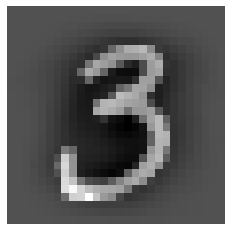

3


In [9]:
plt.imshow(X_[90].reshape(28,28), cmap='gray')
plt.axis("off")
plt.show()

print(Y_test[90])

## Sklearn PCA

In [10]:
pca = PCA(n_components=2) # (m x 784) --> (m x 2)

In [11]:
z_pca = pca.fit_transform(X_)

In [12]:
print(z_pca.shape)

(10000, 2)


In [13]:
print(z_pca)

[[-5.45828505  6.41251327]
 [ 2.80452831 -8.02796535]
 [-7.41123126 -3.86471771]
 ...
 [-5.00435671  1.15291426]
 [-1.42082169 -4.41905428]
 [13.14264846 -4.26487024]]


In [14]:
print(pca.explained_variance_) 
# 100% Variance --> Original Data
# Around 70% Variance Retained In New Data Of 2 Dimension
# 30% Variance Lost

[41.39893397 28.35105719]


## Custom PCA

### Step-2 : Compute Covariance Matrix

#### Trick : (X_.T) . (X_) --> (n x m) . (m x n) --> (n x n) Covariance Matrix !!

In [15]:
covar = np.dot(X_.T, X_)
print(covar.shape)

(784, 784)


### Step-3 : Compute Eigen Vectors Using SVD

In [16]:
U, S, V = svd(covar)

In [17]:
print(U.shape)

(784, 784)


In [18]:
Ured = U[:,:2]
print(Ured.shape)

(784, 2)


### Step-4 : Projection of Data on New Axis (Components)

In [19]:
Z = np.dot(X_, Ured)
print(Z.shape)

(10000, 2)


## Visualise Dataset

In [20]:
new_dataset = np.hstack((Z, Y.reshape(-1,1)))

In [21]:
df = pd.DataFrame(new_dataset, columns=["PC1", "PC2", "Label"])

In [22]:
df.head()

,PC1,PC2,Label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x1080 with 0 Axes>

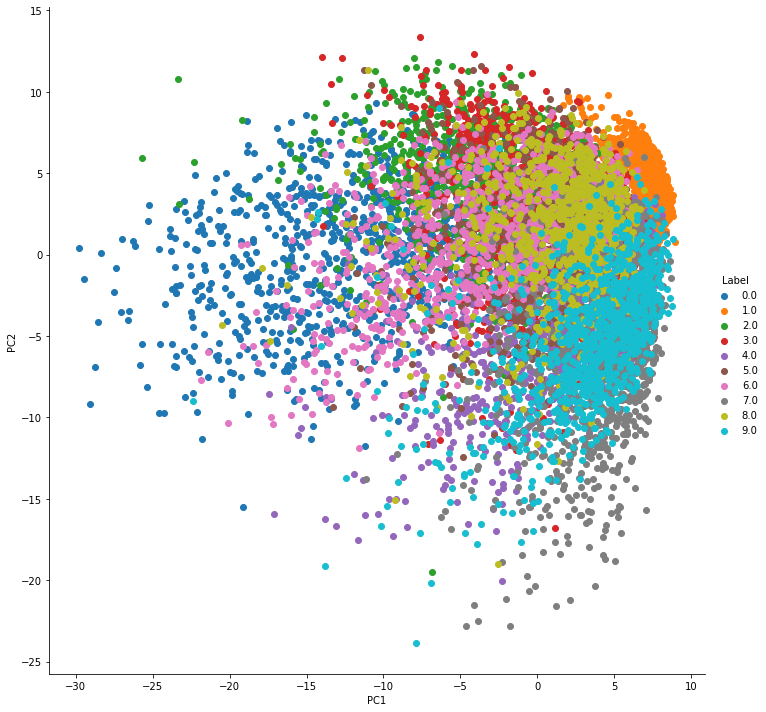

In [23]:
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(df, hue="Label", height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

## PCA with 784 Dimension

In [24]:
pca = PCA()

In [25]:
z_pca = pca.fit_transform(X_)

In [26]:
print(z_pca.shape)

(10000, 784)


In [27]:
print(pca.explained_variance_)

[4.13989340e+01 2.83510581e+01 2.70196465e+01 2.15824995e+01
 1.84057252e+01 1.60945634e+01 1.36639090e+01 1.25807315e+01
 1.11624006e+01 1.01380790e+01 9.83450164e+00 8.75790204e+00
 8.38544770e+00 7.97784570e+00 7.64886637e+00 7.31512409e+00
 6.89333872e+00 6.64082579e+00 6.32396933e+00 6.08974669e+00
 5.94234357e+00 5.78338241e+00 5.65926201e+00 5.48906732e+00
 5.25427495e+00 5.14680013e+00 5.05462485e+00 4.89770948e+00
 4.73536524e+00 4.56603235e+00 4.46677346e+00 4.37046128e+00
 4.32323658e+00 4.15557409e+00 4.03609421e+00 3.95423005e+00
 3.88875015e+00 3.82939953e+00 3.77880871e+00 3.69226086e+00
 3.68222396e+00 3.66141824e+00 3.56686939e+00 3.47145867e+00
 3.42387456e+00 3.33512759e+00 3.32686280e+00 3.26786201e+00
 3.19850249e+00 3.13279782e+00 3.07617536e+00 3.03401082e+00
 2.97856834e+00 2.94000449e+00 2.89943744e+00 2.83019996e+00
 2.80306845e+00 2.76761484e+00 2.74981888e+00 2.70984991e+00
 2.67663139e+00 2.58228202e+00 2.54698454e+00 2.50771929e+00
 2.44812156e+00 2.412342

In [28]:
print(pca.explained_variance_ratio_)

[6.19682546e-02 4.24374595e-02 4.04445278e-02 3.23059001e-02
 2.75507255e-02 2.40912485e-02 2.04529082e-02 1.88315470e-02
 1.67085095e-02 1.51752473e-02 1.47208356e-02 1.31093207e-02
 1.25518101e-02 1.19416885e-02 1.14492537e-02 1.09496895e-02
 1.03183374e-02 9.94036184e-03 9.46607325e-03 9.11547562e-03
 8.89483433e-03 8.65689233e-03 8.47110191e-03 8.21634492e-03
 7.86489450e-03 7.70402013e-03 7.56604698e-03 7.33116722e-03
 7.08816124e-03 6.83469424e-03 6.68611794e-03 6.54195245e-03
 6.47126385e-03 6.22029721e-03 6.04145299e-03 5.91891411e-03
 5.82090011e-03 5.73206076e-03 5.65633358e-03 5.52678388e-03
 5.51176009e-03 5.48061691e-03 5.33909088e-03 5.19627473e-03
 5.12504816e-03 4.99220670e-03 4.97983549e-03 4.89151980e-03
 4.78769856e-03 4.68934811e-03 4.60459243e-03 4.54147817e-03
 4.45848874e-03 4.40076420e-03 4.34004117e-03 4.23640261e-03
 4.19579063e-03 4.14272167e-03 4.11608368e-03 4.05625587e-03
 4.00653252e-03 3.86530508e-03 3.81246982e-03 3.75369538e-03
 3.66448615e-03 3.610929

In [29]:
print(pca.explained_variance_ / np.sum(pca.explained_variance_))

[6.19682546e-02 4.24374595e-02 4.04445278e-02 3.23059001e-02
 2.75507255e-02 2.40912485e-02 2.04529082e-02 1.88315470e-02
 1.67085095e-02 1.51752473e-02 1.47208356e-02 1.31093207e-02
 1.25518101e-02 1.19416885e-02 1.14492537e-02 1.09496895e-02
 1.03183374e-02 9.94036184e-03 9.46607325e-03 9.11547562e-03
 8.89483433e-03 8.65689233e-03 8.47110191e-03 8.21634492e-03
 7.86489450e-03 7.70402013e-03 7.56604698e-03 7.33116722e-03
 7.08816124e-03 6.83469424e-03 6.68611794e-03 6.54195245e-03
 6.47126385e-03 6.22029721e-03 6.04145299e-03 5.91891411e-03
 5.82090011e-03 5.73206076e-03 5.65633358e-03 5.52678388e-03
 5.51176009e-03 5.48061691e-03 5.33909088e-03 5.19627473e-03
 5.12504816e-03 4.99220670e-03 4.97983549e-03 4.89151980e-03
 4.78769856e-03 4.68934811e-03 4.60459243e-03 4.54147817e-03
 4.45848874e-03 4.40076420e-03 4.34004117e-03 4.23640261e-03
 4.19579063e-03 4.14272167e-03 4.11608368e-03 4.05625587e-03
 4.00653252e-03 3.86530508e-03 3.81246982e-03 3.75369538e-03
 3.66448615e-03 3.610929

In [30]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)
print(cum_var_explained)

[0.06196825 0.10440571 0.14485024 0.17715614 0.20470687 0.22879812
 0.24925102 0.26808257 0.28479108 0.29996633 0.31468716 0.32779648
 0.34034829 0.35228998 0.36373924 0.37468893 0.38500726 0.39494763
 0.4044137  0.41352917 0.42242401 0.4310809  0.439552   0.44776835
 0.45563324 0.46333726 0.47090331 0.47823448 0.48532264 0.49215733
 0.49884345 0.5053854  0.51185667 0.51807696 0.52411842 0.53003733
 0.53585823 0.54159029 0.54724663 0.55277341 0.55828517 0.56376579
 0.56910488 0.57430115 0.5794262  0.58441841 0.58939824 0.59428976
 0.59907746 0.60376681 0.6083714  0.61291288 0.61737137 0.62177213
 0.62611217 0.63034858 0.63454437 0.63868709 0.64280317 0.64685943
 0.65086596 0.65473127 0.65854374 0.66229743 0.66596192 0.66957285
 0.67314234 0.6766452  0.68011477 0.68355655 0.68691319 0.69025179
 0.69355391 0.69682147 0.7000608  0.70324833 0.70639452 0.70948764
 0.71255969 0.71557651 0.71855513 0.72146596 0.72433806 0.72718373
 0.72999686 0.73274882 0.73546921 0.73816025 0.74082745 0.7434

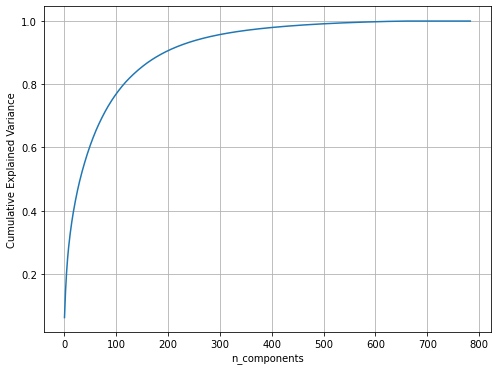

In [31]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

#### To Keep Ideal 90% Variance We Can Reduce No. Of Features To 200 !!